In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
#Load the data
ask_1h = pd.read_csv('ETHUSD_Candlestick_1_Hour_ASK_01.01.2024-31.01.2024.csv')
bid_1h = pd.read_csv('ETHUSD_Candlestick_1_Hour_BID_01.01.2024-31.01.2024.csv')

In [3]:
#Print few rows for Ask data
print(ask_1h.head(5))
print(ask_1h.tail(5))

                         Local time  Open  High   Low  Close   Volume
0  01.01.2024 21:00:00.000 GMT-0000  2338  2349  2336   2340  680.328
1  01.01.2024 22:00:00.000 GMT-0000  2340  2343  2328   2338   30.267
2  01.01.2024 23:00:00.000 GMT-0000  2338  2355  2338   2355   95.904
3  02.01.2024 00:00:00.000 GMT-0000  2355  2395  2351   2391  199.909
4  02.01.2024 01:00:00.000 GMT-0000  2391  2401  2375   2381  119.182
                           Local time  Open  High   Low  Close   Volume
718  31.01.2024 19:00:00.000 GMT-0000  2338  2344  2312   2325  193.165
719  31.01.2024 20:00:00.000 GMT-0000  2325  2327  2288   2290  206.990
720  31.01.2024 21:00:00.000 GMT-0000  2290  2294  2266   2280  251.927
721  31.01.2024 22:00:00.000 GMT-0000  2281  2290  2271   2287   68.433
722  31.01.2024 23:00:00.000 GMT-0000  2287  2290  2284   2285  134.425


In [4]:
##Print few rows for Bid data
print(bid_1h.head(5))
print(bid_1h.tail(5))

                         Local time  Open  High   Low  Close   Volume
0  01.01.2024 21:00:00.000 GMT-0000  2338  2343  2330   2334  748.566
1  01.01.2024 22:00:00.000 GMT-0000  2335  2337  2322   2332   82.266
2  01.01.2024 23:00:00.000 GMT-0000  2332  2349  2332   2349  621.966
3  02.01.2024 00:00:00.000 GMT-0000  2349  2389  2345   2386  928.517
4  02.01.2024 01:00:00.000 GMT-0000  2386  2396  2369   2376  890.653
                           Local time  Open  High   Low  Close     Volume
718  31.01.2024 19:00:00.000 GMT-0000  2333  2340  2307   2320  3291.5249
719  31.01.2024 20:00:00.000 GMT-0000  2320  2322  2283   2285  3389.6761
720  31.01.2024 21:00:00.000 GMT-0000  2285  2289  2261   2276  3462.1711
721  31.01.2024 22:00:00.000 GMT-0000  2275  2285  2265   2283   589.1800
722  31.01.2024 23:00:00.000 GMT-0000  2283  2286  2279   2281  1223.5889


In [5]:
#Merge Ask and Bid
data = pd.merge(bid_1h, ask_1h, on='Local time', how='outer', suffixes=('_bid', '_ask'))
data

,Local time,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask
0,01.01.2024 21:00:00.000 GMT-0000,2338,2343,2330,2334,748.5660,2338,2349,2336,2340,680.328
1,01.01.2024 22:00:00.000 GMT-0000,2335,2337,2322,2332,82.2660,2340,2343,2328,2338,30.267
2,01.01.2024 23:00:00.000 GMT-0000,2332,2349,2332,2349,621.9660,2338,2355,2338,2355,95.904
3,02.01.2024 00:00:00.000 GMT-0000,2349,2389,2345,2386,928.5170,2355,2395,2351,2391,199.909
4,02.01.2024 01:00:00.000 GMT-0000,2386,2396,2369,2376,890.6530,2391,2401,2375,2381,119.182
...,...,...,...,...,...,...,...,...,...,...,...
718,31.01.2024 19:00:00.000 GMT-0000,2333,2340,2307,2320,3291.5249,2338,2344,2312,2325,193.165
719,31.01.2024 20:00:00.000 GMT-0000,2320,2322,2283,2285,3389.6761,2325,2327,2288,2290,206.990
720,31.01.2024 21:00:00.000 GMT-0000,2285,2289,2261,2276,3462.1711,2290,2294,2266,2280,251.927
721,31.01.2024 22:00:00.000 GMT-0000,2275,2285,2265,2283,589.1800,2281,2290,2271,2287,68.433


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  723 non-null    object 
 1   Open_bid    723 non-null    int64  
 2   High_bid    723 non-null    int64  
 3   Low_bid     723 non-null    int64  
 4   Close_bid   723 non-null    int64  
 5   Volume_bid  723 non-null    float64
 6   Open_ask    723 non-null    int64  
 7   High_ask    723 non-null    int64  
 8   Low_ask     723 non-null    int64  
 9   Close_ask   723 non-null    int64  
 10  Volume_ask  723 non-null    float64
dtypes: float64(2), int64(8), object(1)
memory usage: 62.3+ KB


In [7]:
#Drop Null Values
data.dropna(inplace=True)

In [8]:
#rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [9]:
#Check merged data
data.head(5)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,01.01.2024 21:00:00.000 GMT-0000,2338,2343,2330,2334,748.566,2338,2349,2336,2340,680.328
1,01.01.2024 22:00:00.000 GMT-0000,2335,2337,2322,2332,82.266,2340,2343,2328,2338,30.267
2,01.01.2024 23:00:00.000 GMT-0000,2332,2349,2332,2349,621.966,2338,2355,2338,2355,95.904
3,02.01.2024 00:00:00.000 GMT-0000,2349,2389,2345,2386,928.517,2355,2395,2351,2391,199.909
4,02.01.2024 01:00:00.000 GMT-0000,2386,2396,2369,2376,890.653,2391,2401,2375,2381,119.182


In [10]:
#Delta of trading volumes for the merged data
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [11]:
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

In [12]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,2372.500692,2381.987552,2362.394191,2372.403873,2110.105568,2377.937759,2387.438451,2367.875519,2377.845090,425.837904,-1684.267664,1724.564661,5.437068,5.450899,5.481328,5.441217
std,132.941840,134.087482,132.093219,133.033383,1633.546408,132.844963,133.916851,131.945515,132.869787,710.762862,1727.652885,1687.373263,1.161410,1.152504,1.287323,1.148437
min,2182.000000,2190.000000,2102.000000,2182.000000,73.476000,2187.000000,2196.000000,2109.000000,2187.000000,22.732000,-6521.178800,0.000000,0.000000,2.000000,1.000000,0.000000
25%,2251.000000,2258.000000,2241.000000,2251.000000,834.030000,2256.000000,2264.000000,2247.000000,2256.000000,112.904000,-3076.342950,164.340000,5.000000,5.000000,5.000000,5.000000
50%,2339.000000,2348.000000,2332.000000,2338.000000,1550.748000,2344.000000,2352.000000,2337.000000,2343.000000,170.788000,-1165.153000,1168.148000,5.000000,5.000000,5.000000,5.000000
75%,2502.000000,2512.500000,2487.500000,2502.000000,3422.904500,2506.500000,2517.500000,2496.000000,2506.500000,364.366000,-91.912500,3076.342950,6.000000,6.000000,6.000000,6.000000
max,2704.000000,2715.000000,2660.000000,2704.000000,6900.510800,2709.000000,2720.000000,2665.000000,2709.000000,6431.039800,1607.759900,6521.178800,9.000000,9.000000,18.000000,9.000000


In [13]:
data.shape

(723, 17)

In [14]:
data.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,01.01.2024 21:00:00.000 GMT-0000,2338,2343,2330,2334,748.566,2338,2349,2336,2340,680.328,-68.238,68.238,0,6,6,6
1,01.01.2024 22:00:00.000 GMT-0000,2335,2337,2322,2332,82.266,2340,2343,2328,2338,30.267,-51.999,51.999,5,6,6,6
2,01.01.2024 23:00:00.000 GMT-0000,2332,2349,2332,2349,621.966,2338,2355,2338,2355,95.904,-526.062,526.062,6,6,6,6
3,02.01.2024 00:00:00.000 GMT-0000,2349,2389,2345,2386,928.517,2355,2395,2351,2391,199.909,-728.608,728.608,6,6,6,5
4,02.01.2024 01:00:00.000 GMT-0000,2386,2396,2369,2376,890.653,2391,2401,2375,2381,119.182,-771.471,771.471,5,5,6,5


In [15]:
import datetime

In [16]:
#data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [17]:
#Convert Local time to datetime
#data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True, format='mixed', dayfirst=True)
data['Local time cleaned'] = data['Local time'].str.extract(r'^(.*)\sGMT')[0]
data['Local_time_T'] = pd.to_datetime(data['Local time cleaned'], dayfirst=True)

In [18]:
#drop Local time
data=data.drop(['Local time'],axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open_Bid            723 non-null    int64         
 1   High_Bid            723 non-null    int64         
 2   Low_Bid             723 non-null    int64         
 3   Close_Bid           723 non-null    int64         
 4   Volume_Bid          723 non-null    float64       
 5   Open_Ask            723 non-null    int64         
 6   High_Ask            723 non-null    int64         
 7   Low_Ask             723 non-null    int64         
 8   Close_Ask           723 non-null    int64         
 9   Volume_Ask          723 non-null    float64       
 10  Volume_Delta        723 non-null    float64       
 11  Volume_Delta_abs    723 non-null    float64       
 12  Open_Delta          723 non-null    int64         
 13  High_Delta          723 non-null    int64         

<Figure size 900x400 with 0 Axes>

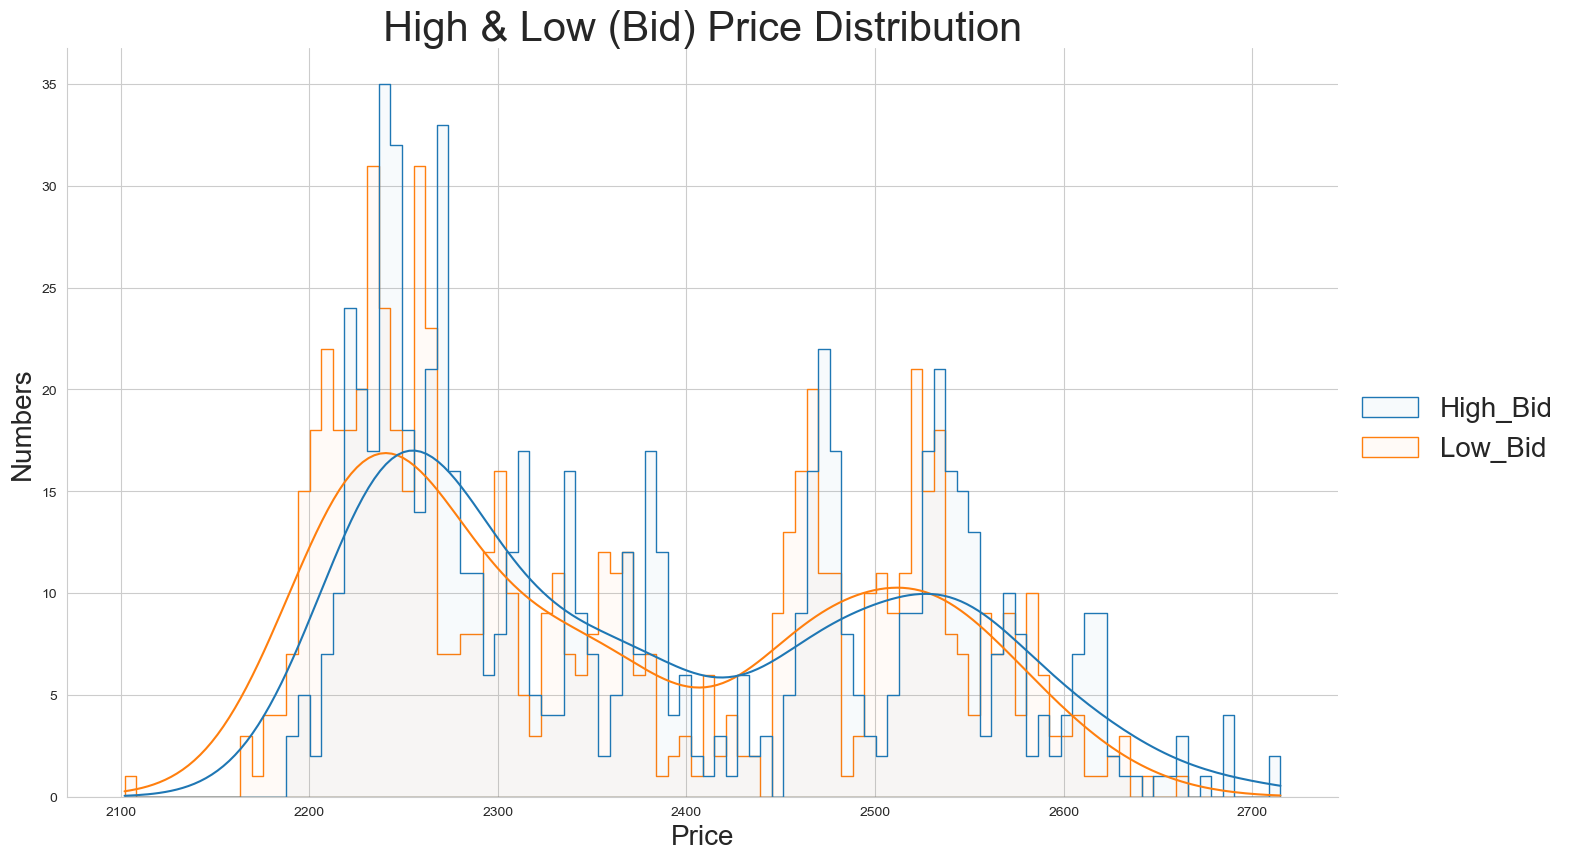

In [20]:
#Ask and Bid Price Distribution
import seaborn as sns

fig = plt.figure(figsize=(9, 4))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

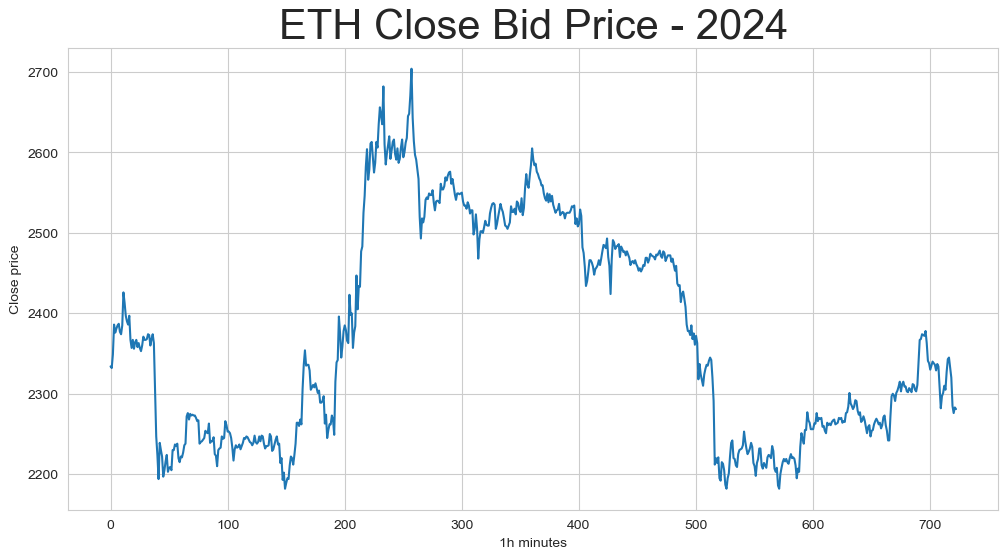

In [21]:
#visualise Close Bid Price
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('ETH Close Bid Price - 2024')
plt.xlabel('1h minutes')
plt.ylabel('Close price')
plt.show()

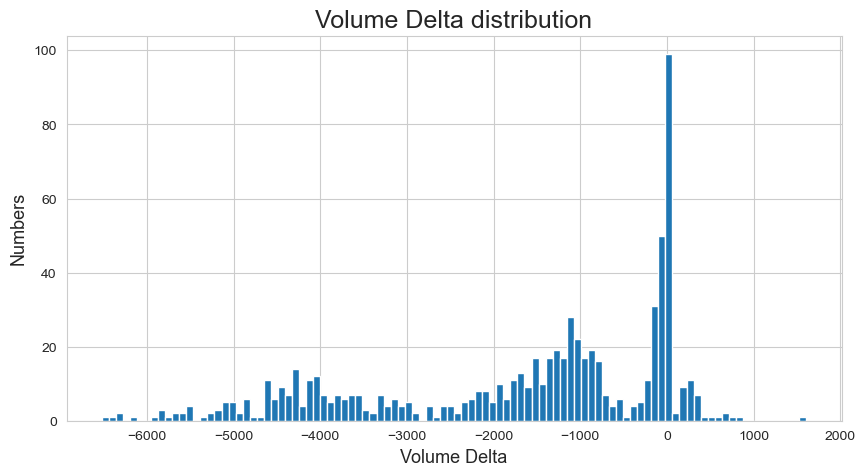

In [22]:
#visualise Volume Delta
plt.figure(num=1,figsize=(10,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13)
plt.show();

In [23]:
#confirm the merged data
print("Merged DataFrame columns:", data.columns)

Merged DataFrame columns: Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T'],
      dtype='object')


In [24]:
#Create additional features 
data['Spread'] = data['Close_Ask'] - data['Close_Bid']
data['Mid_Price'] = (data['Close_Ask'] + data['Close_Bid']) / 2
data['Price_Change'] = (data['Close_Bid'] - data['Open_Bid']) / data['Open_Bid']

In [25]:
#Scale the price data (dividing by 1000)
price_cols_ask = ['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask']
price_cols_bid = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid']

data[price_cols_ask] = data[price_cols_ask] / 1000
data[price_cols_bid] = data[price_cols_bid] / 1000

In [26]:
#Define volume features
data['Volume_Delta'] = data['Volume_Ask'] - data['Volume_Bid']
data['Volume_Delta_abs'] = data['Volume_Delta'].abs()
data['Open_Delta'] = data['Open_Ask'] - data['Open_Bid']
data['High_Delta'] = data['High_Ask'] - data['High_Bid']
data['Low_Delta'] = data['Low_Ask'] - data['Low_Bid']
data['Close_Delta'] = data['Close_Ask'] - data['Close_Bid']

In [27]:
#add ASK and Bid values for time step
data['Y_High_Bid'] = data['High_Bid'].shift(-1)
data['Y_Low_Ask'] = data['Low_Ask'].shift(-1)

In [28]:
#Check for missing values 
data.dropna(inplace=True)

In [29]:
#labels for classification 
data['Label_Ask'] = (data['Close_Ask'].shift(-1) > data['Close_Ask']).astype(int)
data['Label_Bid'] = (data['Close_Bid'].shift(-1) > data['Close_Bid']).astype(int)

In [30]:
#Normalize volume data 
volume_cols = ['Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta', 
               'Low_Delta', 'Close_Delta', 'Y_High_Bid', 'Y_Low_Ask']

In [31]:
scaler = MinMaxScaler()
data[volume_cols] = scaler.fit_transform(data[volume_cols])

In [32]:
#scaling and normalization
print("Scaled and Normalized Merged Dataset:")
print(data.head())

Scaled and Normalized Merged Dataset:
   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  Open_Ask  High_Ask  \
0     2.338     2.343    2.330      2.334    0.098885     2.338     2.349   
1     2.335     2.337    2.322      2.332    0.001288     2.340     2.343   
2     2.332     2.349    2.332      2.349    0.080341     2.338     2.355   
3     2.349     2.389    2.345      2.386    0.125243     2.355     2.395   
4     2.386     2.396    2.369      2.376    0.119697     2.391     2.401   

   Low_Ask  Close_Ask  Volume_Ask  ...  Close_Delta       Local time cleaned  \
0    2.336      2.340    0.102616  ...     0.666667  01.01.2024 21:00:00.000   
1    2.328      2.338    0.001176  ...     0.666667  01.01.2024 22:00:00.000   
2    2.338      2.355    0.011418  ...     0.666667  01.01.2024 23:00:00.000   
3    2.351      2.391    0.027648  ...     0.555556  02.01.2024 00:00:00.000   
4    2.375      2.381    0.015051  ...     0.555556  02.01.2024 01:00:00.000   

         Local_tim

In [33]:
#Candlestick Pattern detection
import numpy as np

def bullish_engulfing(data):
    return (data['Close_Bid'].shift(1) < data['Open_Bid'].shift(1)) & (data['Close_Bid'] > data['Open_Bid']) & (data['Open_Bid'] < data['Close_Bid'].shift(1))

def bearish_engulfing(data):
    return (data['Close_Bid'].shift(1) > data['Open_Bid'].shift(1)) & (data['Close_Bid'] < data['Open_Bid']) & (data['Open_Bid'] > data['Close_Bid'].shift(1))

def morning_star(data):
    return (data['Close_Bid'].shift(2) < data['Open_Bid'].shift(2)) & (data['Close_Bid'].shift(1) < data['Open_Bid'].shift(1)) & (data['Close_Bid'] > data['Open_Bid'])

def evening_star(data):
    return (data['Close_Bid'].shift(2) > data['Open_Bid'].shift(2)) & (data['Close_Bid'].shift(1) > data['Open_Bid'].shift(1)) & (data['Close_Bid'] < data['Open_Bid'])

def hammer(data):
    body = np.abs(data['Close_Bid'] - data['Open_Bid'])
    upper_shadow = data['High_Bid'] - np.maximum(data['Close_Bid'], data['Open_Bid'])
    lower_shadow = np.minimum(data['Close_Bid'], data['Open_Bid']) - data['Low_Bid']
    return (body <= 0.3 * (data['High_Bid'] - data['Low_Bid'])) & (lower_shadow >= 2 * body)

def shooting_star(data):
    body = np.abs(data['Close_Bid'] - data['Open_Bid'])
    upper_shadow = data['High_Bid'] - np.maximum(data['Close_Bid'], data['Open_Bid'])
    lower_shadow = np.minimum(data['Close_Bid'], data['Open_Bid']) - data['Low_Bid']
    return (body <= 0.3 * (data['High_Bid'] - data['Low_Bid'])) & (upper_shadow >= 2 * body)

In [34]:
#add patterns to dataframe
data['bullish_engulfing'] = bullish_engulfing(data).astype(int)
data['bearish_engulfing'] = bearish_engulfing(data).astype(int)
data['morning_star'] = morning_star(data).astype(int)
data['evening_star'] = evening_star(data).astype(int)
data['hammer'] = hammer(data).astype(int)
data['shooting_star'] = shooting_star(data).astype(int)

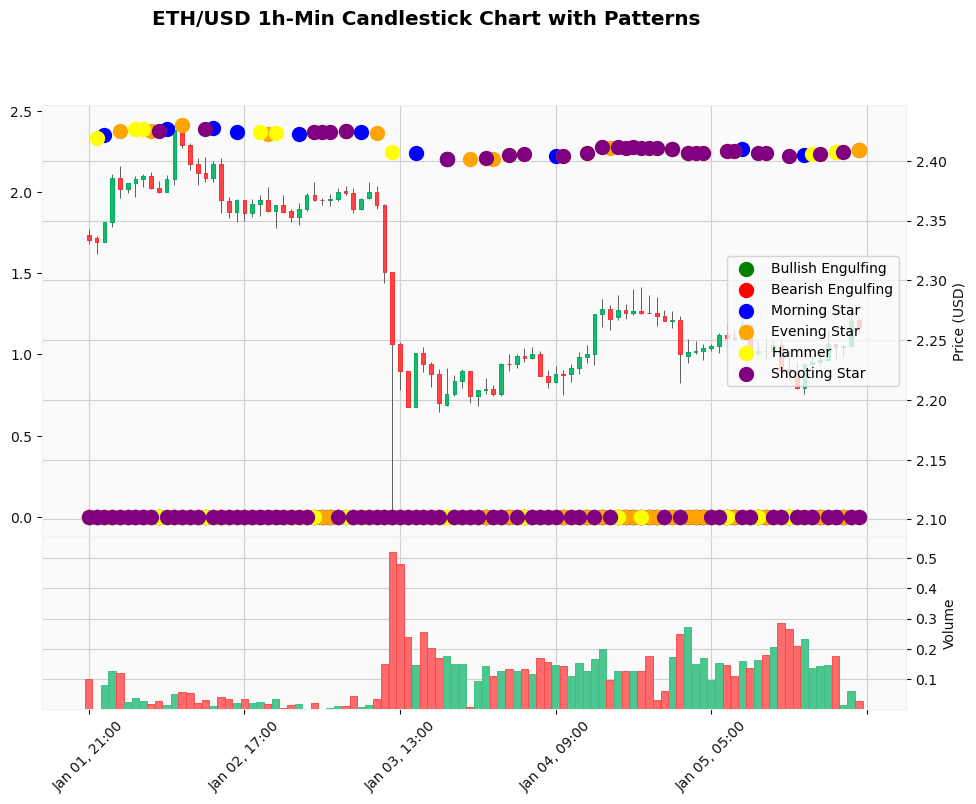

In [35]:
#Visualise Candlestick patterns
df_plot = data.iloc[:100].copy()
df_plot.set_index('Local_time_T', inplace=True)
addplots = []
if 'bullish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bullish_engulfing'], type='scatter', markersize=100, marker='o', color='green', label='Bullish Engulfing'))
if 'bearish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bearish_engulfing'], type='scatter', markersize=100, marker='o', color='red', label='Bearish Engulfing'))
if 'morning_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['morning_star'], type='scatter', markersize=100, marker='o', color='blue', label='Morning Star'))
if 'evening_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['evening_star'], type='scatter', markersize=100, marker='o', color='orange', label='Evening Star'))
if 'hammer' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['hammer'], type='scatter', markersize=100, marker='o', color='yellow', label='Hammer'))
if 'shooting_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['shooting_star'], type='scatter', markersize=100, marker='o', color='purple', label='Shooting Star'))

df_plot = df_plot.rename(columns={
    'Open_Bid': 'Open',
    'High_Bid': 'High',
    'Low_Bid': 'Low',
    'Close_Bid': 'Close',
    'Volume_Bid': 'Volume'  
})

mpf.plot(
    df_plot,
    type='candle',
    style='yahoo',
    title='ETH/USD 1h-Min Candlestick Chart with Patterns',
    ylabel='Price (USD)',
    volume=True,
    addplot=addplots,
    figscale=1.5,
    show_nontrading=False
)

plt.show()

In [36]:
#1 day period for 1st January 2024
data['Local_time_T'] = pd.to_datetime(data['Local_time_T'], utc=True)

start_date = pd.to_datetime('2024-01-01 00:00:00+00:00', utc=True)
end_date = pd.to_datetime('2024-01-01 23:55:00+00:00', utc=True)
df_day = data[(data['Local_time_T'] >= start_date) & (data['Local_time_T'] <= end_date)].copy()

print("Jan 1, 2024 (checking bullish_engulfing):")
print(df_day[['Local_time_T', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'bullish_engulfing']].head(10))

Jan 1, 2024 (checking bullish_engulfing):
               Local_time_T  Open_Bid  High_Bid  Low_Bid  Close_Bid  \
0 2024-01-01 21:00:00+00:00     2.338     2.343    2.330      2.334   
1 2024-01-01 22:00:00+00:00     2.335     2.337    2.322      2.332   
2 2024-01-01 23:00:00+00:00     2.332     2.349    2.332      2.349   

   bullish_engulfing  
0                  0  
1                  0  
2                  0  


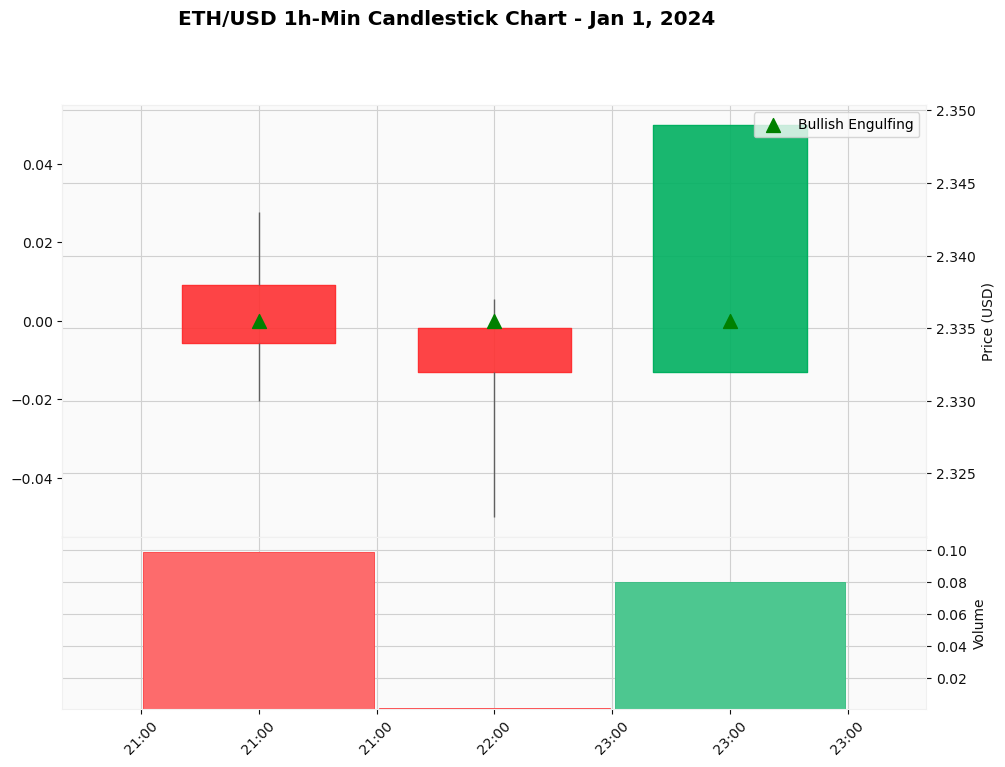

In [37]:
#Visualise for 1st jan bullish engulfing
df_plot = df_day.set_index('Local_time_T') 
addplots = []
if 'bullish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bullish_engulfing'], type='scatter', markersize=100, marker='^', color='green', label='Bullish Engulfing'))
df_plot.columns = df_plot.columns.str.strip()

df_plot = df_plot.rename(columns={
    'Open_Bid': 'Open',
    'High_Bid': 'High',
    'Low_Bid': 'Low',
    'Close_Bid': 'Close',
    'Volume_Bid': 'Volume'
})

mpf.plot(
    df_plot,
    type='candle',
    style='yahoo',
    title='ETH/USD 1h-Min Candlestick Chart - Jan 1, 2024',
    ylabel='Price (USD)',
    volume=True,
    addplot=addplots,
    figscale=1.5,
    show_nontrading=False
)
plt.show()

In [41]:
#pattern detection in dataframe
print(data[['Local_time_T', 'bullish_engulfing', 'bearish_engulfing', 'morning_star', 'evening_star', 'hammer', 'shooting_star']].head())

               Local_time_T  bullish_engulfing  bearish_engulfing  \
0 2024-01-01 21:00:00+00:00                  0                  0   
1 2024-01-01 22:00:00+00:00                  0                  0   
2 2024-01-01 23:00:00+00:00                  0                  0   
3 2024-01-02 00:00:00+00:00                  0                  0   
4 2024-01-02 01:00:00+00:00                  0                  0   

   morning_star  evening_star  hammer  shooting_star  
0             0             0       0              0  
1             0             0       1              0  
2             1             0       0              0  
3             0             0       0              0  
4             0             1       0              0  


In [42]:
#extract the date from formatted timestamp
data["Local_time_T"] = pd.to_datetime(data["Local_time_T"])
data["date"] = data["Local_time_T"].dt.date

In [43]:
#Technical Indicators
#Moving Averages
data['MA_10'] = data['Close_Bid'].rolling(window=10, min_periods=1).mean().round(2)
data['MA_20'] = data['Close_Bid'].rolling(window=20, min_periods=1).mean().round(2)
data['MA_50'] = data['Close_Bid'].rolling(window=50, min_periods=1).mean().round(2)

data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,bullish_engulfing,bearish_engulfing,morning_star,evening_star,hammer,shooting_star,date,MA_10,MA_20,MA_50
0,2.338,2.343,2.330,2.334,0.098885,2.338,2.349,2.336,2.340,0.102616,...,0,0,0,0,0,0,2024-01-01,2.33,2.33,2.33
1,2.335,2.337,2.322,2.332,0.001288,2.340,2.343,2.328,2.338,0.001176,...,0,0,0,0,1,0,2024-01-01,2.33,2.33,2.33
2,2.332,2.349,2.332,2.349,0.080341,2.338,2.355,2.338,2.355,0.011418,...,0,0,1,0,0,0,2024-01-01,2.34,2.34,2.34
3,2.349,2.389,2.345,2.386,0.125243,2.355,2.395,2.351,2.391,0.027648,...,0,0,0,0,0,0,2024-01-02,2.35,2.35,2.35
4,2.386,2.396,2.369,2.376,0.119697,2.391,2.401,2.375,2.381,0.015051,...,0,0,0,1,0,0,2024-01-02,2.36,2.36,2.36


In [44]:
print(data.columns)

Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T',
       'Spread', 'Mid_Price', 'Price_Change', 'Y_High_Bid', 'Y_Low_Ask',
       'Label_Ask', 'Label_Bid', 'bullish_engulfing', 'bearish_engulfing',
       'morning_star', 'evening_star', 'hammer', 'shooting_star', 'date',
       'MA_10', 'MA_20', 'MA_50'],
      dtype='object')


In [45]:
#Percentage Change for Volatility 
data['Pct_Change_1h'] = data['Close_Bid'].pct_change(1).abs()

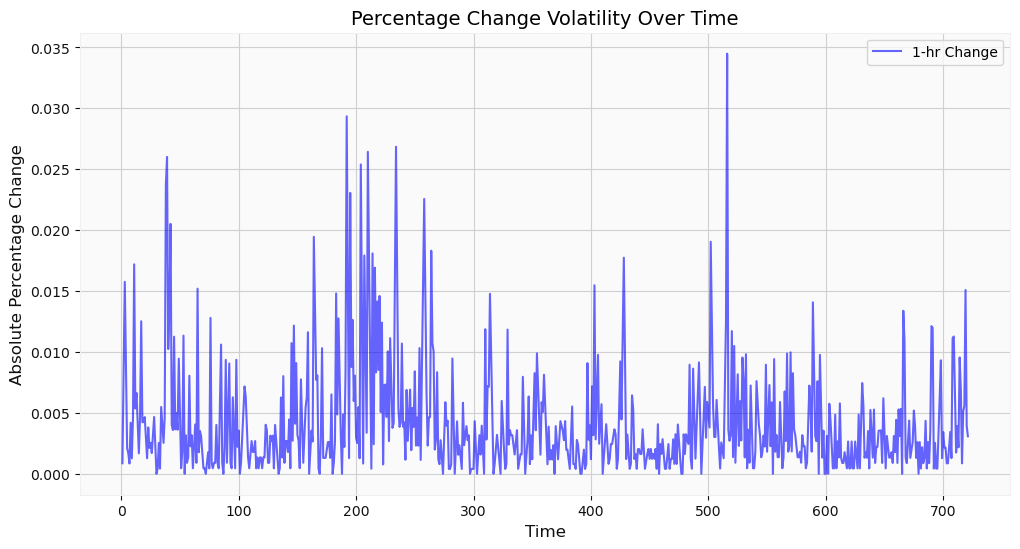

In [46]:
#Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Pct_Change_1h'], label='1-hr Change', color='blue', alpha=0.6)
plt.title("Percentage Change Volatility Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Absolute Percentage Change", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#Average True Range 
data['ATR'] = data['Open_Bid'].rolling(window=14).max() - data['Close_Bid'].rolling(window=14).min()

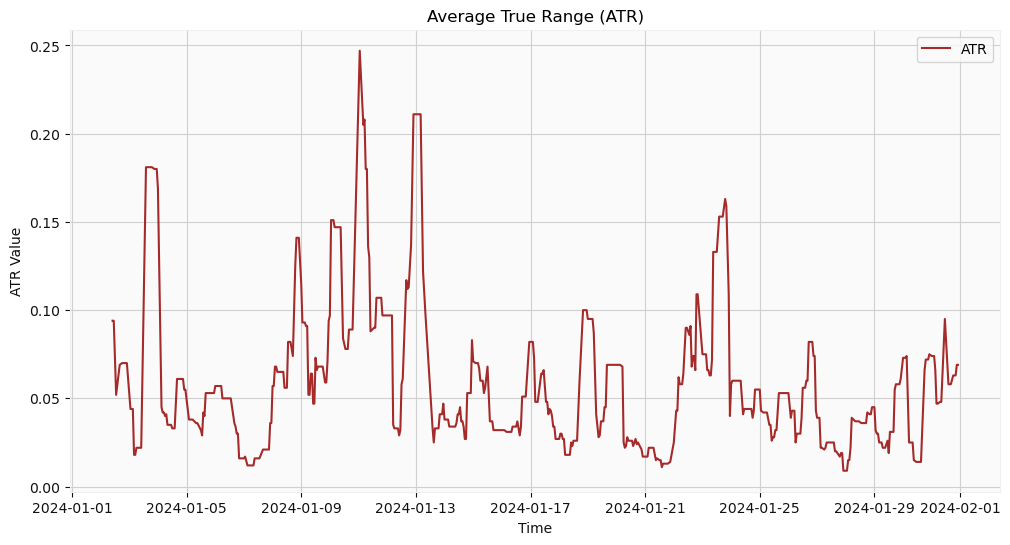

In [48]:
#Plot for Average True Range
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['ATR'], label='ATR', color='brown')
plt.title('Average True Range (ATR)')
plt.xlabel('Time')
plt.ylabel('ATR Value')
plt.legend()
plt.show()

In [96]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29421 sha256=ab5e228b8fd2ee39405bdcde2ec1f7a899e538b56214413eee46f720a8a6760e
  Stored in directory: c:\users\mike\appdata\local\pip\cache\wheels\5c\a1\5f\c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [98]:
#Parabolic SAR Indicator
from ta.trend import PSARIndicator

last_day_date = data['Local_time_T'].max().normalize()
one_day_data = data[data['Local_time_T'].dt.date == last_day_date.date()]

psar = PSARIndicator(high=one_day_data['High_Bid'],
                     low=one_day_data['Low_Bid'],
                     close=one_day_data['Close_Bid'],
                     step=0.02, max_step=0.2)

one_day_data['Parabolic_SAR'] = psar.psar()

C:\Users\Mike\AppData\Local\Temp\ipykernel_308\708590701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day_data['Parabolic_SAR'] = psar.psar()


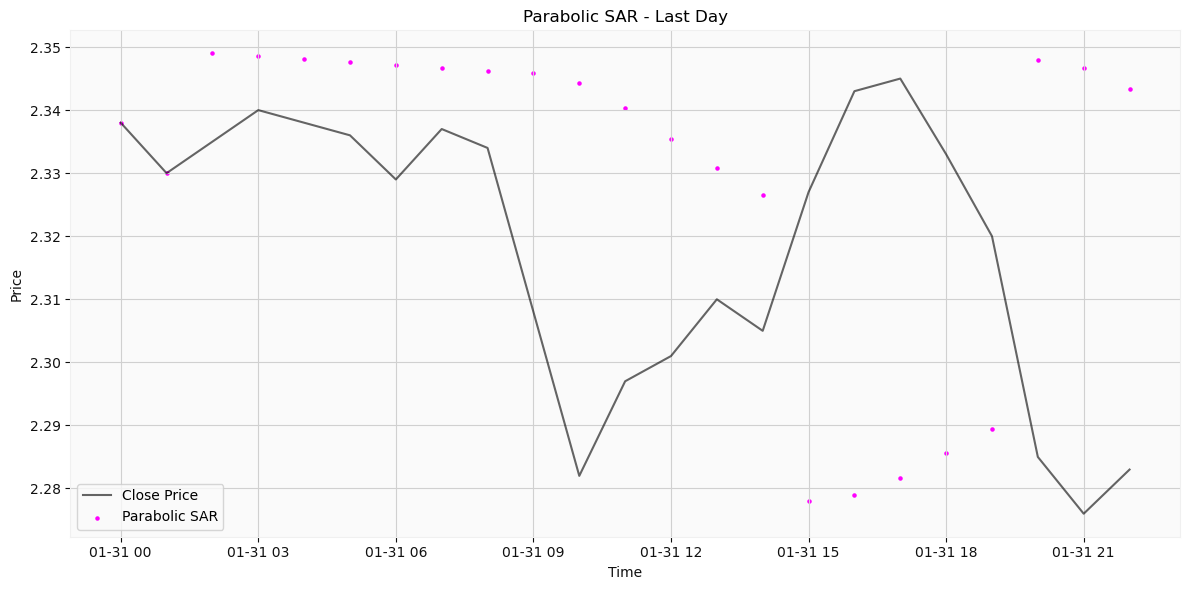

In [100]:
#Visualisation for Parabolic SAR
plt.figure(figsize=(12, 6))
plt.plot(one_day_data['Local_time_T'], one_day_data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.scatter(one_day_data['Local_time_T'], one_day_data['Parabolic_SAR'], label='Parabolic SAR', color='magenta', marker='.', s=20)
plt.title('Parabolic SAR - Last Day')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
#Ichimoku Indicator
from ta.trend import IchimokuIndicator

last_day_date = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day_date.date()]

ichimoku = IchimokuIndicator(
    high=one_day_data['High_Bid'],
    low=one_day_data['Low_Bid'],
    window1=9,     
    window2=26,    
    window3=52     
)

one_day_data['tenkan_sen'] = ichimoku.ichimoku_conversion_line()
one_day_data['kijun_sen'] = ichimoku.ichimoku_base_line()
one_day_data['senkou_span_a'] = ichimoku.ichimoku_a()
one_day_data['senkou_span_b'] = ichimoku.ichimoku_b()


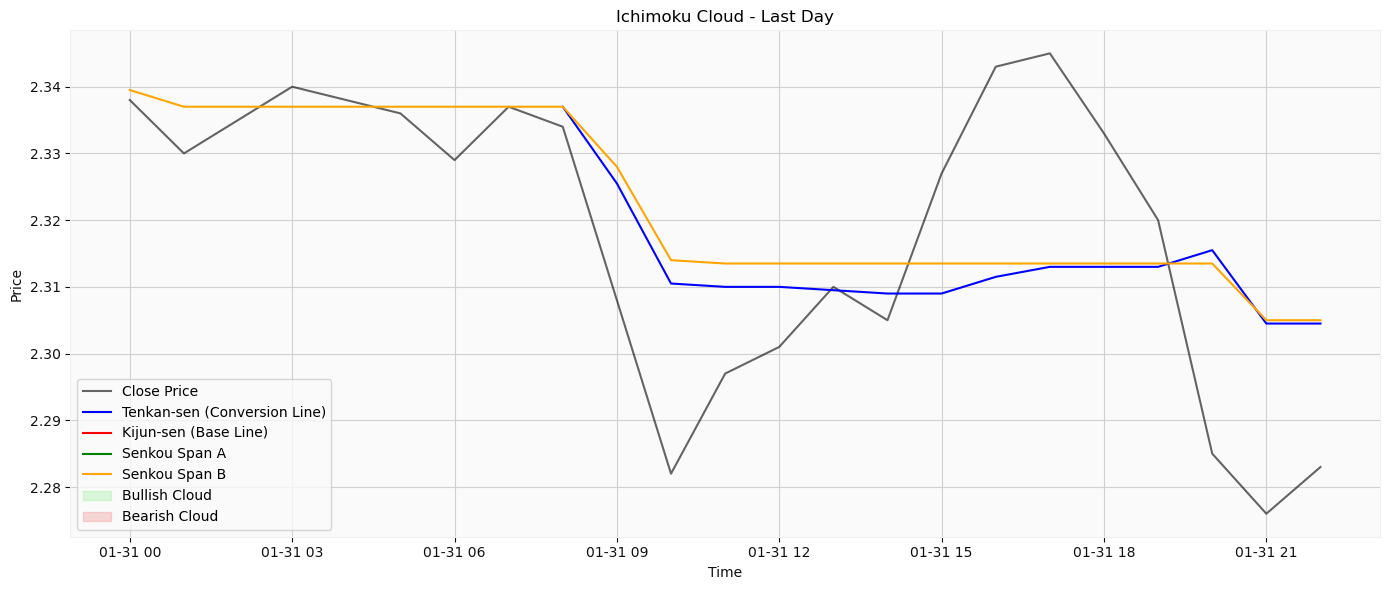

In [104]:
#Visualise Ichimoku Indicator
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(one_day_data['Local_time_T'], one_day_data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.plot(one_day_data['Local_time_T'], one_day_data['tenkan_sen'], label='Tenkan-sen (Conversion Line)', color='blue')
plt.plot(one_day_data['Local_time_T'], one_day_data['kijun_sen'], label='Kijun-sen (Base Line)', color='red')
plt.plot(one_day_data['Local_time_T'], one_day_data['senkou_span_a'], label='Senkou Span A', color='green')
plt.plot(one_day_data['Local_time_T'], one_day_data['senkou_span_b'], label='Senkou Span B', color='orange')

plt.fill_between(
    one_day_data['Local_time_T'],
    one_day_data['senkou_span_a'],
    one_day_data['senkou_span_b'],
    where=one_day_data['senkou_span_a'] >= one_day_data['senkou_span_b'],
    color='lightgreen',
    alpha=0.3,
    label='Bullish Cloud'
)

plt.fill_between(
    one_day_data['Local_time_T'],
    one_day_data['senkou_span_a'],
    one_day_data['senkou_span_b'],
    where=one_day_data['senkou_span_a'] < one_day_data['senkou_span_b'],
    color='lightcoral',
    alpha=0.3,
    label='Bearish Cloud'
)

plt.title('Ichimoku Cloud - Last Day')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
#CCI Indicator
from ta.trend import CCIIndicator
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()]

cci = CCIIndicator(
    high=one_day_data['High_Bid'],
    low=one_day_data['Low_Bid'],
    close=one_day_data['Close_Bid'],
    window=10,
    constant=0.015
)
one_day_data['CCI'] = cci.cci()

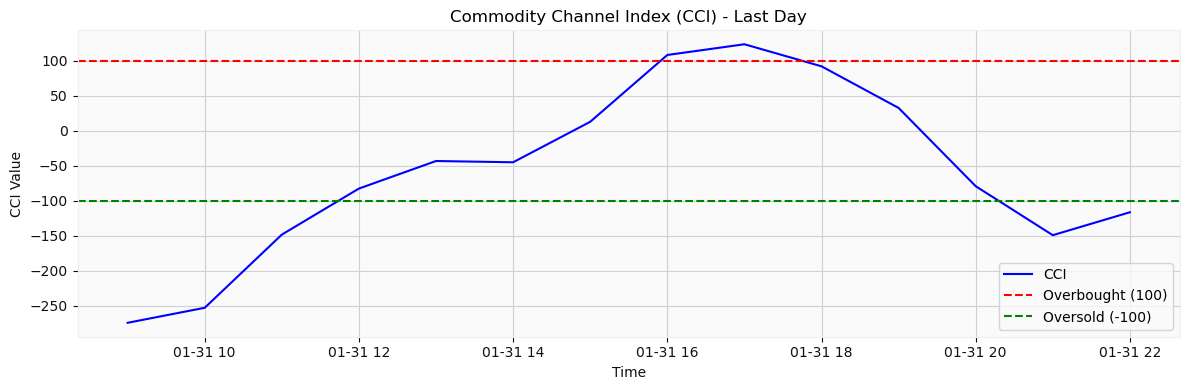

In [108]:
#Visualise CCI Indicator
plt.figure(figsize=(12, 4))
plt.plot(one_day_data['Local_time_T'], one_day_data['CCI'], label='CCI', color='blue')
plt.axhline(100, linestyle='--', color='red', label='Overbought (100)')
plt.axhline(-100, linestyle='--', color='green', label='Oversold (-100)')
plt.title('Commodity Channel Index (CCI) - Last Day')
plt.xlabel('Time')
plt.ylabel('CCI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
#WilliamsR Indicator
from ta.momentum import WilliamsRIndicator
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()]

williams_r = WilliamsRIndicator(
    high=one_day_data['High_Bid'],
    low=one_day_data['Low_Bid'],
    close=one_day_data['Close_Bid'],
    lbp=14
)
one_day_data['Williams_%R'] = williams_r.williams_r()

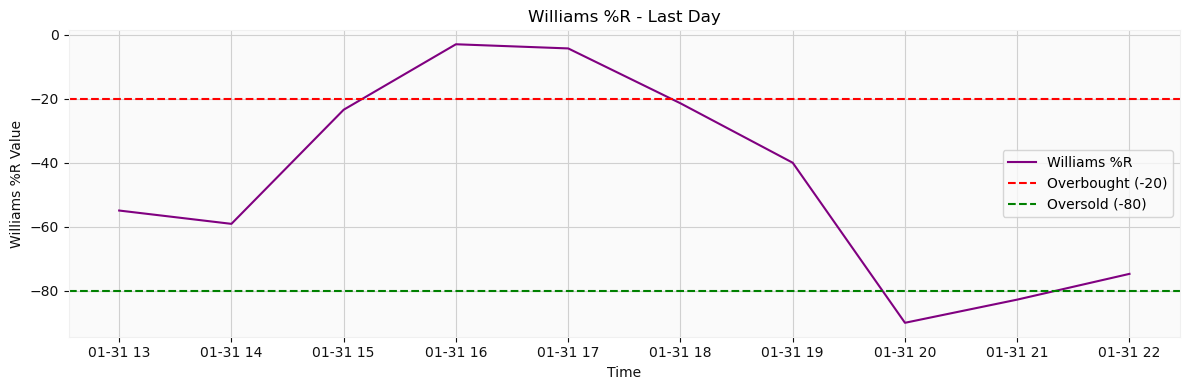

In [112]:
#Visualisation WilliamsR Indicator
plt.figure(figsize=(12, 4))
plt.plot(one_day_data['Local_time_T'], one_day_data['Williams_%R'], label='Williams %R', color='purple')
plt.axhline(-20, linestyle='--', color='red', label='Overbought (-20)')
plt.axhline(-80, linestyle='--', color='green', label='Oversold (-80)')
plt.title("Williams %R - Last Day")
plt.xlabel("Time")
plt.ylabel("Williams %R Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Concatenate, Input, Flatten
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner as kt
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings('ignore')

In [124]:
#Volume Average
data['vol_ma'] = data['Volume_Bid'].rolling(window=20).mean()

In [126]:
# Volatility percentage
data['Volatility'] = data['Close_Bid'].pct_change().rolling(window=20).std() * np.sqrt(252) * 100

In [128]:
#Define Target
# 1 for Long (bullish), 0 for Short (bearish)
data['Market_Direction'] = np.where(data['bullish_engulfing'] | data['morning_star'] | data['hammer'], 1, 
                                   np.where(data['bearish_engulfing'] | data['evening_star'] | data['shooting_star'], 0, np.nan))
data['Market_Direction'] = data['Market_Direction'].ffill().bfill()

In [130]:
# Drop NaN values
data.dropna(inplace=True)

In [132]:
print(data.shape)

(702, 40)


In [134]:
data.columns

Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T',
       'Spread', 'Mid_Price', 'Price_Change', 'Y_High_Bid', 'Y_Low_Ask',
       'Label_Ask', 'Label_Bid', 'bullish_engulfing', 'bearish_engulfing',
       'morning_star', 'evening_star', 'hammer', 'shooting_star', 'date',
       'MA_10', 'MA_20', 'MA_50', 'Pct_Change_1h', 'ATR', 'vol_ma',
       'Volatility', 'Market_Direction'],
      dtype='object')

In [192]:
#Feature Selection
features = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Spread', 'Mid_Price', 'Price_Change', 'Y_High_Bid', 'Y_Low_Ask',
       'Label_Ask', 'Label_Bid', 'bullish_engulfing', 'bearish_engulfing',
       'morning_star', 'evening_star', 'hammer', 'shooting_star',
       'MA_10', 'MA_20', 'MA_50', 'Pct_Change_1h', 'ATR', 'vol_ma',
       'Volatility']

In [194]:
#Define X and y
X = data[features]
y = data['Market_Direction']

In [196]:
#Split data
train_size = int(len(data) * 0.8)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [198]:
print(X_train.shape)
print(X_test.shape)

(561, 36)
(141, 36)


In [200]:
#Drop non-numeric columns
non_numeric_cols = ['Local time cleaned', 'date', 'Local_time_T']  
X_train = X_train.drop(columns=[col for col in non_numeric_cols if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in non_numeric_cols if col in X_test.columns])

In [202]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
#Sequences for time series
def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [206]:
time_steps = 20
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

In [208]:
print(X_train_seq.shape)
print(y_train_seq.shape)

(541, 20, 36)
(541,)


In [210]:
#Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [212]:
#Earlystopping
#Model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_cnn = ModelCheckpoint('best_cnn.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_lstm = ModelCheckpoint('best_lstm.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_cnn_lstm = ModelCheckpoint('best_cnn_lstm.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_transformer = ModelCheckpoint('best_transformer.h5', monitor='val_accuracy', save_best_only=True)

Machine Learning Models

In [215]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest - Accuracy: 0.7518, Precision: 0.7466, Recall: 0.7518, F1-Score: 0.7420


In [217]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")

Decision Tree - Accuracy: 0.8298, Precision: 0.8286, Recall: 0.8298, F1-Score: 0.8290


In [219]:
#XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_metrics = evaluate_model(y_test, y_pred_xgb, "XGBoost")

XGBoost - Accuracy: 0.8014, Precision: 0.7990, Recall: 0.8014, F1-Score: 0.7995


Neural Network Models

In [222]:
#CNN with Keras Tuner
def build_cnn(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5]),
                     activation='relu',
                     input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [224]:
#Hyperparameter tunning
tuner_cnn = kt.Hyperband(build_cnn, objective='val_accuracy', max_epochs=50, directory='cnn_tuner', project_name='cnn')
tuner_cnn.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_cnn = tuner_cnn.get_best_models(num_models=1)[0]
best_cnn.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
             callbacks=[early_stopping, checkpoint_cnn], verbose=1)
y_pred_cnn = (best_cnn.predict(X_test_seq) > 0.5).astype(int)
y_pred_cnn_proba = best_cnn.predict(X_test_seq).flatten()
cnn_metrics = evaluate_model(y_test_seq, y_pred_cnn.flatten(), "CNN")

Reloading Tuner from cnn_tuner\cnn\tuner0.json
Epoch 1/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9666 - loss: 0.1332 

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9641 - loss: 0.1363 - val_accuracy: 0.7769 - val_loss: 0.5709
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9656 - loss: 0.0972 - val_accuracy: 0.7769 - val_loss: 0.5676
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9932 - loss: 0.0772 - val_accuracy: 0.7107 - val_loss: 0.6836
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9802 - loss: 0.0710 - val_accuracy: 0.7355 - val_loss: 0.6854
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9891 - loss: 0.0524 - val_accuracy: 0.7603 - val_loss: 0.5941
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9864 - loss: 0.0561 - val_accuracy: 0.7769 - val_loss: 0.6446
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9926 - loss: 0.0507 - val_accuracy: 0.7603 - val_loss: 0.6801
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0266 - val_accuracy: 0.7438 - val_loss: 0.

In [226]:
#LSTM with Keras Tuner
def build_lstm(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units', 50, 200, step=50),
                   input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                   return_sequences=False))
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [228]:
#Hyperparameter tunning
tuner_lstm = kt.Hyperband(build_lstm, objective='val_accuracy', max_epochs=50, directory='lstm_tuner', project_name='lstm')
tuner_lstm.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_lstm = tuner_lstm.get_best_models(num_models=1)[0]
best_lstm.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
              callbacks=[early_stopping, checkpoint_lstm], verbose=1)
y_pred_lstm = (best_lstm.predict(X_test_seq) > 0.5).astype(int)
y_pred_lstm_proba = best_lstm.predict(X_test_seq).flatten()
lstm_metrics = evaluate_model(y_test_seq, y_pred_lstm.flatten(), "LSTM")

Reloading Tuner from lstm_tuner\lstm\tuner0.json
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8373 - loss: 0.3984

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8375 - loss: 0.3977 - val_accuracy: 0.7769 - val_loss: 0.4829
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8273 - loss: 0.3212 - val_accuracy: 0.7355 - val_loss: 0.4963
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8446 - loss: 0.3640 - val_accuracy: 0.7603 - val_loss: 0.5234
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8829 - loss: 0.2836 - val_accuracy: 0.7603 - val_loss: 0.5098
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8792 - loss: 0.2697 - val_accuracy: 0.7438 - val_loss: 0.4991
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9044 - loss: 0.2398 - val_accuracy: 0.7686 - val_loss: 0.5781
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9428 - loss: 0.1638 - val_accuracy: 0.7521 - val_loss: 0.6319
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8831 - loss: 0.2574 - val_accuracy: 0.7273 - val_loss: 0.

In [230]:
#CNN-LSTM with Keras Tuner
def build_cnn_lstm(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5]),
                     activation='relu',
                     input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(hp.Int('lstm_units', 50, 200, step=50), return_sequences=False))
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [232]:
#Hyperparameter tunning
tuner_cnn_lstm = kt.Hyperband(build_cnn_lstm, objective='val_accuracy', max_epochs=50, directory='cnn_lstm_tuner', project_name='cnn_lstm')
tuner_cnn_lstm.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_cnn_lstm = tuner_cnn_lstm.get_best_models(num_models=1)[0]
best_cnn_lstm.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
                  callbacks=[early_stopping, checkpoint_cnn_lstm], verbose=1)
y_pred_cnn_lstm = (best_cnn_lstm.predict(X_test_seq) > 0.5).astype(int)
y_pred_cnn_lstm_proba = best_cnn_lstm.predict(X_test_seq).flatten()
cnn_lstm_metrics = evaluate_model(y_test_seq, y_pred_cnn_lstm.flatten(), "CNN-LSTM")

Reloading Tuner from cnn_lstm_tuner\cnn_lstm\tuner0.json
Epoch 1/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9571 - loss: 0.1522

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9529 - loss: 0.1565 - val_accuracy: 0.7273 - val_loss: 0.6533
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9499 - loss: 0.1566

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9495 - loss: 0.1571 - val_accuracy: 0.7686 - val_loss: 0.6433
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9566 - loss: 0.1277 - val_accuracy: 0.7438 - val_loss: 0.6733
Epoch 4/50
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9563 - loss: 0.1313

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9557 - loss: 0.1301 - val_accuracy: 0.7769 - val_loss: 0.7337
Epoch 5/50
14/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9652 - loss: 0.1040

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9648 - loss: 0.1043 - val_accuracy: 0.7851 - val_loss: 0.7051
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9660 - loss: 0.1066 - val_accuracy: 0.7438 - val_loss: 0.7563
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9846 - loss: 0.0788 - val_accuracy: 0.7603 - val_loss: 0.8791
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.7769 - val_loss: 1.0838
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.7603 - val_loss: 0.8710
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9891 - loss: 0.0405 - val_accuracy: 0.7521 - val_loss: 0.9629
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.7355 - val_loss: 1.1017
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9889 - loss: 0.0424 - val_accuracy: 0.7686 - val_loss:

In [234]:
#Vanilla Transformer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)
    ffn = Sequential([
        Dense(ff_dim, activation='relu'),
        Dense(inputs.shape[-1])
    ])
    x = ffn(x)
    x = Dropout(dropout)(x)
    return LayerNormalization(epsilon=1e-6)(x + inputs)

In [236]:
def build_transformer(hp):
    inputs = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
    x = inputs
    for _ in range(hp.Int('transformer_layers', 1, 3)):
        x = transformer_encoder(x, 
                               head_size=hp.Choice('head_size', [64, 128]),
                               num_heads=hp.Choice('num_heads', [2, 4]),
                               ff_dim=hp.Int('ff_dim', 128, 512, step=128),
                               dropout=hp.Float('dropout', 0.1, 0.5, step=0.1))
    x = Flatten()(x)
    x = Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu')(x)
    x = Dropout(hp.Float('dense_dropout', 0.1, 0.5, step=0.1))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [238]:
#Hyperparameter tunning
tuner_transformer = kt.Hyperband(build_transformer, objective='val_accuracy', max_epochs=50, directory='transformer_tuner_v2', project_name='transformer')
tuner_transformer.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_transformer = tuner_transformer.get_best_models(num_models=1)[0]
best_transformer.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
                    callbacks=[early_stopping, checkpoint_transformer], verbose=1)
y_pred_transformer = (best_transformer.predict(X_test_seq) > 0.5).astype(int)
y_pred_transformer_proba = best_transformer.predict(X_test_seq).flatten()
transformer_metrics = evaluate_model(y_test_seq, y_pred_transformer.flatten(), "Transformer")

Reloading Tuner from transformer_tuner_v2\transformer\tuner0.json
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8798 - loss: 0.2722

17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.8788 - loss: 0.2747 - val_accuracy: 0.7438 - val_loss: 0.5221
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9441 - loss: 0.1840 - val_accuracy: 0.6860 - val_loss: 0.6715
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9763 - loss: 0.1074

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9763 - loss: 0.1073 - val_accuracy: 0.7521 - val_loss: 0.6307
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9951 - loss: 0.0596 - val_accuracy: 0.7355 - val_loss: 0.7010
Epoch 5/50
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9993 - loss: 0.0400

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9992 - loss: 0.0399 - val_accuracy: 0.7603 - val_loss: 0.6832
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.0263 - val_accuracy: 0.7603 - val_loss: 0.7545
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 0.7438 - val_loss: 0.7908
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.7438 - val_loss: 0.8138
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.7521 - val_loss: 0.8404
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.7438 - val_loss: 0.8389
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.7438 - val_loss: 0.8595
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Transformer - Accuracy: 0.7438, Precision: 

In [240]:
#Save best model
best_model = tuner_lstm.get_best_models(num_models=1)[0]

In [241]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200)            │       189,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,701 (780.08 KB)

 Trainable params: 199,701 (780.08 KB)

 Non-trainable params: 0 (0.00 B)

None


In [244]:
#Trailing Stop and Backtesting
def backtest_trailing_stop(df, model, scaler, features, threshold=0.5, stop_loss_pct=0.02, take_profit_pct=0.05):
    capital = 10000
    position = 0
    entry_price = 0
    trade_history = []
    df['trailing_stop'] = np.nan
    df['position'] = 0
    df['predicted_proba'] = np.nan

    for i in range(time_steps, len(df)):
        seq = df[features].iloc[i-time_steps:i].values
        seq_scaled = scaler.transform(seq)
        seq_scaled = seq_scaled.reshape(1, time_steps, len(features))
        
        if isinstance(model, (xgb.XGBClassifier, DecisionTreeClassifier)):
            pred_proba = model.predict_proba(seq_scaled[:, -1, :])[0][1]
        else:
            pred_proba = model.predict(seq_scaled, verbose=0)[0][0]
        
        df.loc[df.index[i], 'predicted_proba'] = pred_proba

        if pred_proba > threshold and position == 0:
            if df['bullish_engulfing'].iloc[i] == 1:
                position = capital / df['Close_Bid'].iloc[i]
                entry_price = df['Close_Bid'].iloc[i]
                stop_loss = entry_price * (1 - stop_loss_pct)
                trade_history.append({'entry': entry_price, 'stop_loss': stop_loss, 'profit': 0})
                df.loc[df.index[i], 'position'] = 1

        if position > 0:
            highest_price = df['High_Bid'].iloc[i-time_steps:i+1].max()
            df.loc[df.index[i], 'trailing_stop'] = max(df['trailing_stop'].iloc[i-1] if i > 0 else stop_loss, 
                                                      highest_price * (1 - stop_loss_pct))
            
            if df['Close_Bid'].iloc[i] <= df['trailing_stop'].iloc[i] or df['Close_Bid'].iloc[i] >= entry_price * (1 + take_profit_pct):
                exit_price = df['Close_Bid'].iloc[i]
                profit = (exit_price - entry_price) * position
                capital += profit
                trade_history[-1]['profit'] = profit
                trade_history.append({'entry': entry_price, 'exit': exit_price, 'profit': profit})
                print(f"Exit Long at {exit_price} on {df['Local_time_T'].iloc[i]} with PnL: {profit:.2f}")
                position = 0
                df.loc[df.index[i], 'position'] = 0

    total_profit = sum(trade['profit'] for trade in trade_history if 'profit' in trade)
    print(f"\nTotal Profit from Backtest: {total_profit:.2f} USD")
    return df, trade_history, capital

In [246]:
data, trade_history, final_capital = backtest_trailing_stop(data, best_lstm, scaler, features)

Exit Long at 2.336 on 2024-01-08 18:00:00+00:00 with PnL: 594.10
Exit Long at 2.447 on 2024-01-10 15:00:00+00:00 with PnL: 604.07

Total Profit from Backtest: 2396.35 USD


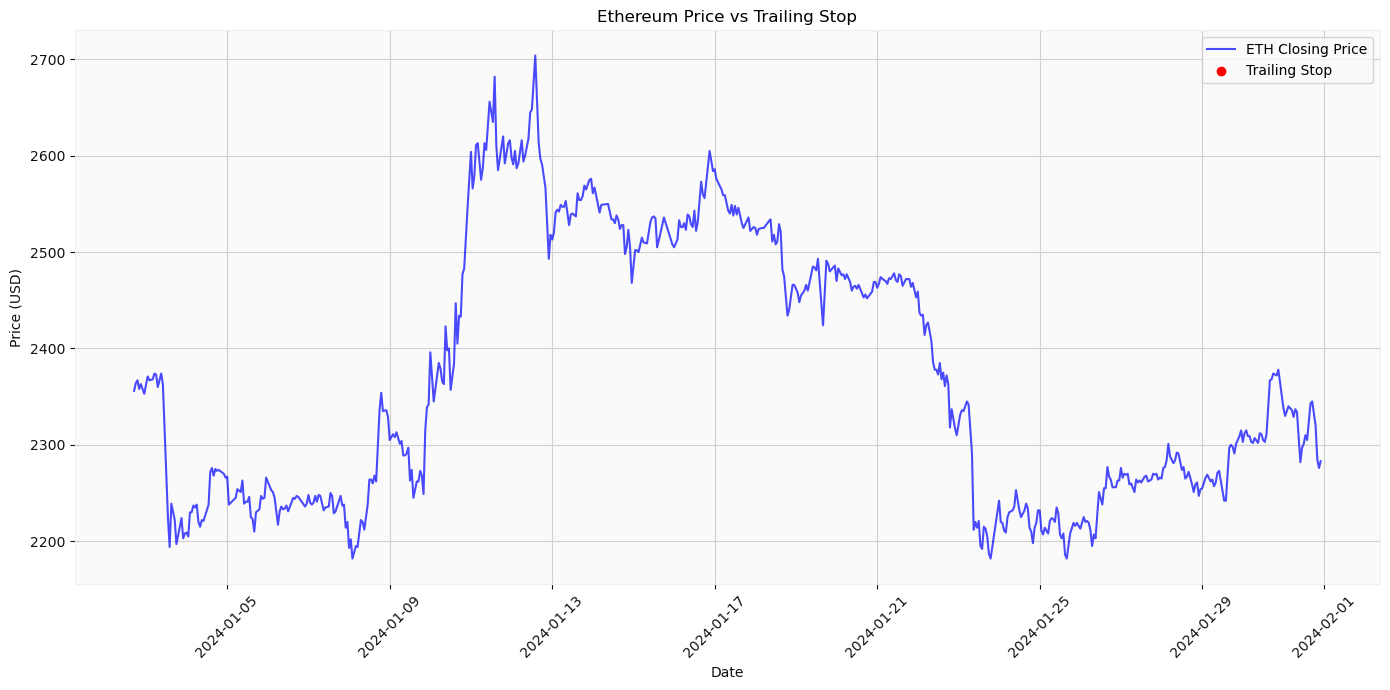

In [248]:
#Visualization of trailing stop
def visualize_trailing_stop(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Local_time_T'], df['Close_Bid'] * 1000, label='ETH Closing Price', color='blue', alpha=0.7)
    trailing_stop_points = df[df['trailing_stop'].notnull()]
    plt.scatter(trailing_stop_points['Local_time_T'], trailing_stop_points['trailing_stop'] * 1000, 
                color='red', label='Trailing Stop', zorder=5)
    plt.plot(trailing_stop_points['Local_time_T'], trailing_stop_points['trailing_stop'] * 1000, 
             color='red', linestyle='--', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Ethereum Price vs Trailing Stop')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_trailing_stop(data)

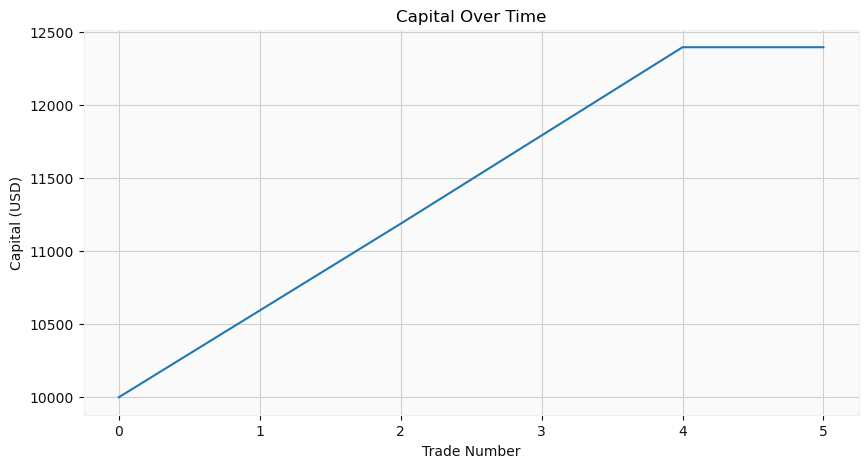

In [250]:
#Capital Over Time
capital_history = [10000]
for trade in trade_history:
    if 'profit' in trade:
        capital_history.append(capital_history[-1] + trade['profit'])

plt.figure(figsize=(10, 5))
plt.plot(capital_history)
plt.title('Capital Over Time')
plt.xlabel('Trade Number')
plt.ylabel('Capital (USD)')
plt.show()

In [252]:
#Calculate Predicted Probabilities
print("Predicted Probabilities:")
print(data[['Local_time_T', 'predicted_proba']].tail(10))

Predicted Probabilities:
                 Local_time_T  predicted_proba
712 2024-01-31 13:00:00+00:00         0.806166
713 2024-01-31 14:00:00+00:00         0.231325
714 2024-01-31 15:00:00+00:00         0.199518
715 2024-01-31 16:00:00+00:00         0.292949
716 2024-01-31 17:00:00+00:00         0.319998
717 2024-01-31 18:00:00+00:00         0.303163
718 2024-01-31 19:00:00+00:00         0.155794
719 2024-01-31 20:00:00+00:00         0.300924
720 2024-01-31 21:00:00+00:00         0.604038
721 2024-01-31 22:00:00+00:00         0.912675


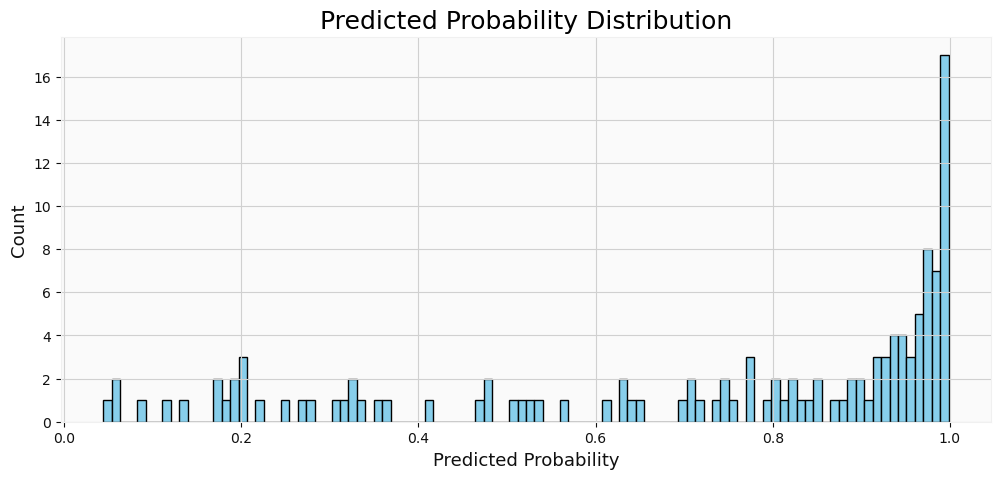

In [254]:
#Visualise predicted probability
import matplotlib.pyplot as plt

plt.figure(num=1, figsize=(12, 5))
plt.hist(y_pred_cnn_proba, bins=100, color='skyblue', edgecolor='black')
plt.title('Predicted Probability Distribution', size=18)
plt.xlabel('Predicted Probability', size=13)
plt.ylabel('Count', size=13)
plt.grid(True)
plt.show()

In [258]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76        51
         1.0       0.86      0.88      0.87        90

    accuracy                           0.83       141
   macro avg       0.82      0.81      0.81       141
weighted avg       0.83      0.83      0.83       141



In [260]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71        51
         1.0       0.83      0.87      0.85        90

    accuracy                           0.80       141
   macro avg       0.79      0.78      0.78       141
weighted avg       0.80      0.80      0.80       141



In [262]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61        51
         1.0       0.77      0.88      0.82        90

    accuracy                           0.75       141
   macro avg       0.74      0.70      0.71       141
weighted avg       0.75      0.75      0.74       141



In [266]:
print(classification_report(y_test_seq, y_pred_cnn.flatten()))

              precision    recall  f1-score   support

         0.0       0.76      0.52      0.62        42
         1.0       0.78      0.91      0.84        79

    accuracy                           0.78       121
   macro avg       0.77      0.72      0.73       121
weighted avg       0.77      0.78      0.76       121



In [268]:
print(classification_report(y_test_seq, y_pred_lstm.flatten()))

              precision    recall  f1-score   support

         0.0       0.74      0.55      0.63        42
         1.0       0.79      0.90      0.84        79

    accuracy                           0.78       121
   macro avg       0.77      0.72      0.74       121
weighted avg       0.77      0.78      0.77       121



In [270]:
print(classification_report(y_test_seq, y_pred_cnn_lstm.flatten()))

              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65        42
         1.0       0.81      0.85      0.83        79

    accuracy                           0.77       121
   macro avg       0.75      0.73      0.74       121
weighted avg       0.76      0.77      0.77       121



In [272]:
print(classification_report(y_test_seq, y_pred_transformer.flatten()))

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64        42
         1.0       0.81      0.80      0.80        79

    accuracy                           0.74       121
   macro avg       0.72      0.72      0.72       121
weighted avg       0.75      0.74      0.74       121

